# Logistic Regression Project Exercise 

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

**Complete the TASKs written in bold below.**

## Imports

**TASK: Run the cell below to import the necessary libraries.**

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease


----

**TASK: Run the cell below to read in the data.**

In [93]:
df = pd.read_csv('heart.csv')

In [94]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


----
----

# Machine Learning

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [95]:
X = df.drop('target', axis=1)
y = df['target']

In [96]:
#5
# code here

**TASK: Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [98]:
#7
# code here

In [99]:
#8
# code here

**TASK: Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay
print("")

In [102]:
from sklearn.metrics import classification_report
print("")

## Logistic Regression Model

**TASK: Create a Logistic Regression model 

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

log_model = LogisticRegression(solver='liblinear', max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
confusion_m = confusion_matrix(y_test,y_pred)
print("Confusion Matrix Array:")
print(confusion_m)

Confusion Matrix Array:
[[12  3]
 [ 2 14]]


### Coeffecients

**TASK: Report back the model's coefficients.**

In [104]:
print("Model Coefficients:")
print(log_model.coef_)

Model Coefficients:
[[-0.07128298 -0.73407386  0.89392964 -0.26266521 -0.21250408  0.04585712
   0.12038735  0.43439179 -0.42822672 -0.52709209  0.38142427 -0.85179312
  -0.57498319]]


---------

## Model Performance Evaluation

**TASK: Let's now evaluate your model on the remaining 10% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [105]:
print("")

Confusion Matrix Plot:


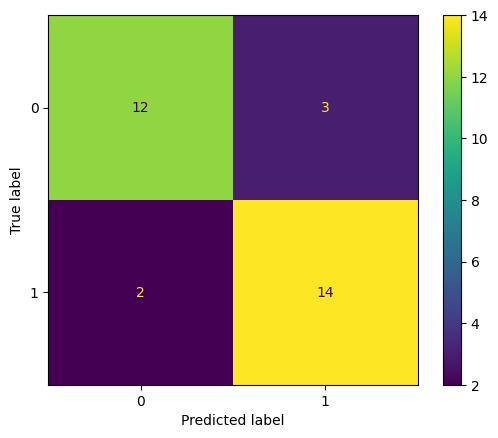

In [106]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Confusion Matrix Plot:")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_m, display_labels=log_model.classes_)
disp.plot()
plt.show()

In [107]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [108]:
#17
# code here

In [109]:
#18
# CODE HERE

In [110]:
#19
# code here

### Performance Curves

**TASK: Create the ROC Curve.**

ROC Curve:


Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

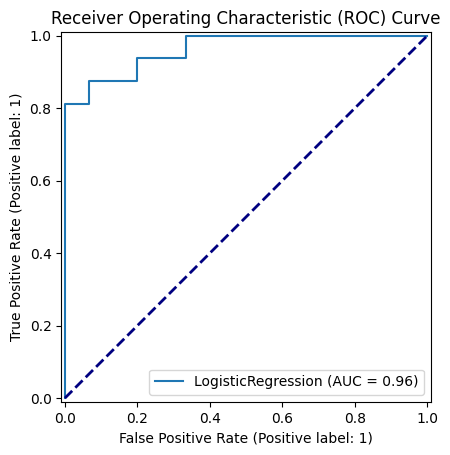

In [111]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

print("ROC Curve:")
RocCurveDisplay.from_estimator(log_model, X_test, y_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')

In [112]:
#21
# CODE HERE

In [113]:
plt.show()

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**TASK: What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [114]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [115]:
scaled_patient = scaler.transform(patient)
predicted_class = log_model.predict(scaled_patient)
predicted_proba = log_model.predict_proba(scaled_patient)

print(f"Patient Data (Original): {patient}")
print(f"Patient Data (Scaled): {scaled_patient}")
print(f"Predicted Class for Patient: {predicted_class[0]}")
print(f"Prediction Probability (No Disease=0, Has Disease=1): {predicted_proba[0]}")

if predicted_class[0] == 1:
    print("\nThe model predicts that the patient likely HAS heart disease.")
    print(f"The model is {predicted_proba[0][1]*100:.2f}% sure of this prediction.")
else:
    print("\nThe model predicts that the patient likely DOES NOT have heart disease.")
    print(f"The model is {predicted_proba[0][0]*100:.2f}% sure of this prediction.")

Patient Data (Original): [[54.0, 1.0, 0.0, 122.0, 286.0, 0.0, 0.0, 116.0, 1.0, 3.2, 1.0, 2.0, 2.0]]
Patient Data (Scaled): [[-0.03345031  0.69737995 -0.94692412 -0.55319325  0.75524961 -0.42732739
  -0.99577247 -1.49008466  1.47064295  1.97686092 -0.67167968  1.23823052
  -0.4842146 ]]
Predicted Class for Patient: 0
Prediction Probability (No Disease=0, Has Disease=1): [0.99090774 0.00909226]

The model predicts that the patient likely DOES NOT have heart disease.
The model is 99.09% sure of this prediction.


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [116]:
#25
# EXPECTED PREDICTION

----

## Great Job!